#METAR/TAF - Exploratory data analysis

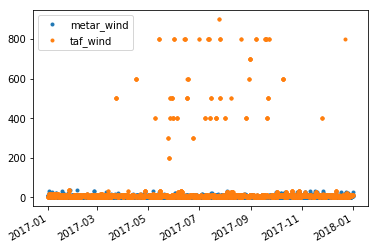

In [6]:
import os
import pandas as pd
import io

db_dir ='../3.DBGenerator/output' 
df = pd.read_csv('../3.DBGenerator/output/2017/SBGR_2017.csv',index_col=0,parse_dates=[0])
#df = pd.read_csv('../3.DBGenerator/output/2016/SBGR_2016.csv',index_col=0,parse_dates=[0])
#df = pd.read_csv('../3.DBGenerator/output/2015/SBGR_2015.csv',index_col=0,parse_dates=[0])
df = df.dropna(axis=0, how='any')

df.plot(y=["metar_wind","taf_wind"],style='.')


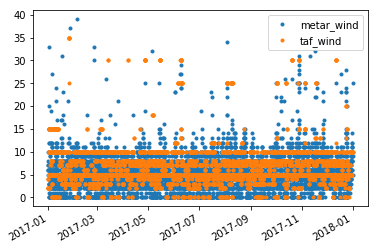

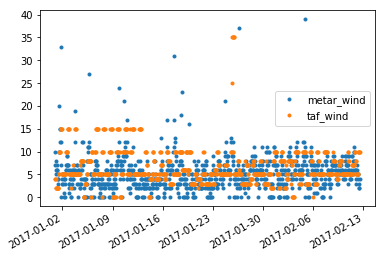

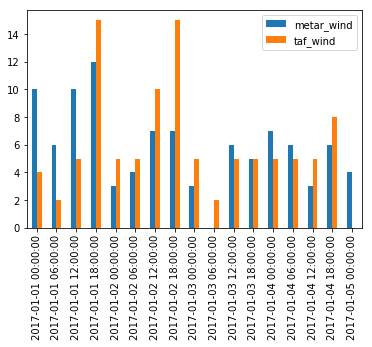

In [15]:
#clean data >99 (trash data), max 99kt on metar/taf messages
df = df[df.taf_wind<99]
df.plot(y=["metar_wind","taf_wind"],style='.')
df[0:1000].plot(y=["metar_wind","taf_wind"],style='.')
df[0:100:6].plot.bar(y=["metar_wind","taf_wind"],style='.')

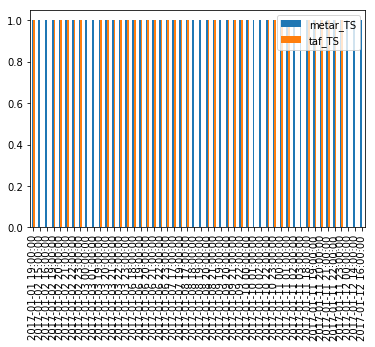

In [21]:
df_ts = df[df.metar_TS==1]
df_ts[0:50].plot.bar(y=["metar_TS","taf_TS"],style='.')

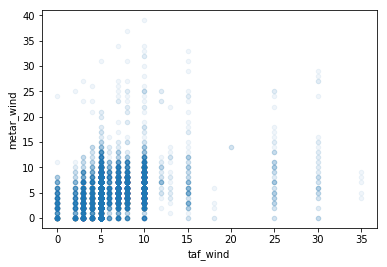

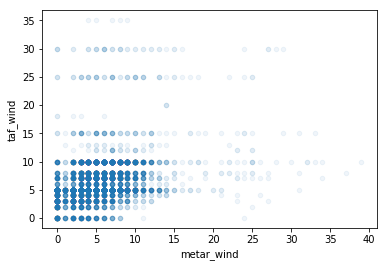

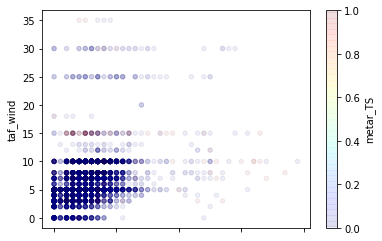

In [23]:
df.plot.scatter(x='taf_wind',  y='metar_wind',alpha=1/15)
df.plot.scatter(x='metar_wind',y='taf_wind',alpha=1/15)
df.plot.scatter(x='metar_wind',y='taf_wind',c='metar_TS', colormap='jet',alpha=1/15)

In [71]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Compute the root-mean-square
rms = np.sqrt(mean_squared_error(df.metar_wind, df.taf_wind))
print("Total RMS_wind = {:.3}".format(rms))

delta = 5
metar_wind_max = int(df.metar_wind.max()) + 5
last = 0
for i in range(5,metar_wind_max,delta):
    ndf = df[df.metar_wind.between(last,i-1)]
    rms = np.sqrt(mean_squared_error(ndf.metar_wind, ndf.taf_wind))
    print("RMS_wind [{},{}] = {:.3} on {} ({:.2%})".format(last,i-1,rms,len(ndf),len(ndf)/len(df)))
    last = i


Total RMS_wind = 4.33
RMS_wind [0,4] = 4.26 on 3872 (45.74%)
RMS_wind [5,9] = 3.5 on 3920 (46.31%)
RMS_wind [10,14] = 5.65 on 558 (6.59%)
RMS_wind [15,19] = 9.32 on 46 (0.54%)
RMS_wind [20,24] = 13.7 on 32 (0.38%)
RMS_wind [25,29] = 15.2 on 25 (0.30%)
RMS_wind [30,34] = 22.3 on 10 (0.12%)
RMS_wind [35,39] = 29.0 on 2 (0.02%)


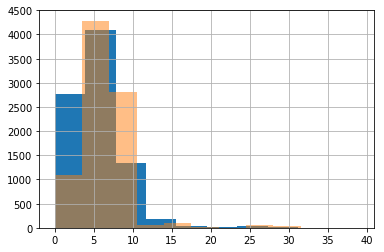

In [66]:
df.metar_wind.hist()
df.taf_wind.hist(alpha=0.5)

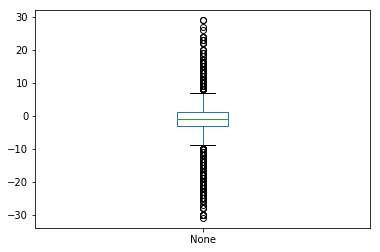

In [72]:
(df.metar_wind-df.taf_wind).plot.box()